In [1]:
import pandas as pd

# Load the dataset
file_path = "/Users/marclambertes/Downloads/xG 04022025.xlsx"
df = pd.read_excel(file_path)

# Define key timestamps
match_start = df["Time_in_sec"].min()
first_half_end = 2700
second_half_start = 2700
match_end = 5400

# Select a specific TeamId
team_id = "Arsenal FC"  # Replace with desired team

# Filter the dataframe for the selected team
team_df = df[df["TeamId"] == team_id]

# Extract goal times for the team
team_goal_times = team_df[team_df["Goal"] == 1]["Time_in_sec"].tolist()

# Create interval list
team_intervals = sorted(set([match_start, first_half_end, second_half_start, match_end] + team_goal_times))

# Create a DataFrame for intervals
team_intervals_df = pd.DataFrame(team_intervals, columns=["Time_in_sec"])
team_intervals_df["xG"] = 0.0
team_intervals_df["Gamestate"] = ""

# Calculate xG for each interval and assign Gamestate
for i in range(len(team_intervals_df) - 1):
    start_time = team_intervals_df.loc[i, "Time_in_sec"]
    end_time = team_intervals_df.loc[i + 1, "Time_in_sec"]
    
    # Summing xG within the interval
    xg_sum = team_df[(team_df["Time_in_sec"] >= start_time) & (team_df["Time_in_sec"] < end_time)]["xG"].astype(float).sum()
    
    # Assigning xG to the interval
    team_intervals_df.loc[i, "xG"] = xg_sum

    # Assigning Gamestate to the interval
    gamestate_values = team_df[(team_df["Time_in_sec"] >= start_time) & (team_df["Time_in_sec"] < end_time)]["Gamestate"].unique()
    if len(gamestate_values) > 0:
        team_intervals_df.loc[i, "Gamestate"] = gamestate_values[-1]

# Convert Time_in_sec to minutes
team_intervals_df["Time_in_min"] = (team_intervals_df["Time_in_sec"] / 60).round(2)

# Reorder columns
team_intervals_df = team_intervals_df[["Time_in_min", "xG", "Gamestate"]]

# Display the result
print(team_intervals_df)


    Time_in_min        xG Gamestate
0          0.00  0.506398      Draw
1          1.73  1.461923      Draw
2          5.63  1.262897      Draw
3          8.63  0.877455      Draw
4          9.68  1.607882  Trailing
5         14.02  0.126335      Draw
6         14.10  0.626570      Draw
7         15.58  1.850974  Trailing
8         19.17  0.436952      Draw
9         21.23  0.269388   Leading
10        22.38  1.758443  Trailing
11        24.52  1.177884  Trailing
12        26.28  1.259363  Trailing
13        28.38  1.189657  Trailing
14        33.63  0.928277      Draw
15        34.13  0.776782      Draw
16        35.07  1.765490  Trailing
17        37.62  0.710549   Leading
18        37.98  1.935229   Leading
19        39.53  0.278363   Leading
20        42.12  0.491930      Draw
21        43.67  0.301797   Leading
22        45.00  0.000000          
23        45.07  0.829157   Leading
24        45.72  1.738491      Draw
25        49.28  0.790000   Leading
26        49.30  1.048873   

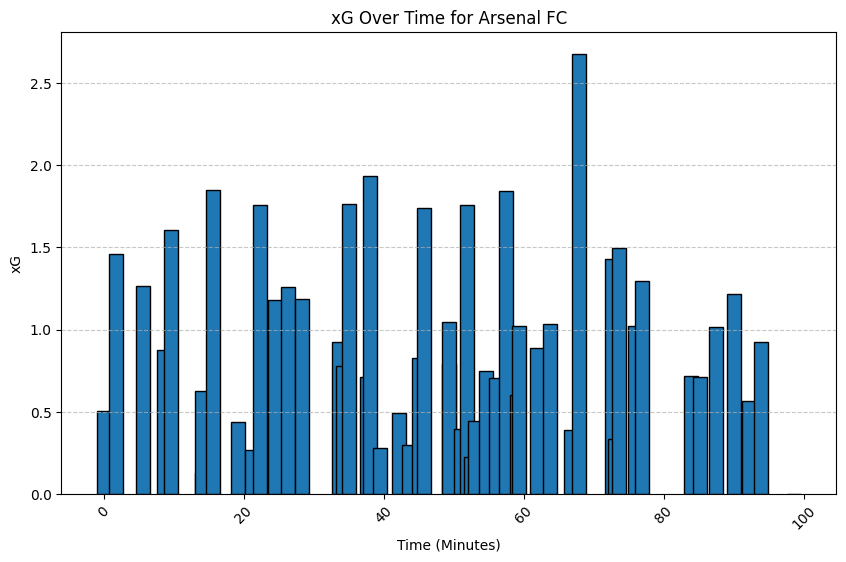

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/marclambertes/Downloads/xG 04022025.xlsx"
df = pd.read_excel(file_path)

# Define key timestamps
match_start = df["Time_in_sec"].min()
first_half_end = 2700
second_half_start = 2700
match_end = 5400

# Select a specific TeamId
team_id = "Arsenal FC"  # Replace with desired team

# Filter the dataframe for the selected team
team_df = df[df["TeamId"] == team_id]

# Extract goal times for the team
team_goal_times = team_df[team_df["Goal"] == 1]["Time_in_sec"].tolist()

# Create interval list
team_intervals = sorted(set([match_start, first_half_end, second_half_start, match_end] + team_goal_times))

# Create a DataFrame for intervals
team_intervals_df = pd.DataFrame(team_intervals, columns=["Time_in_sec"])
team_intervals_df["xG"] = 0.0
team_intervals_df["Gamestate"] = ""

# Calculate xG for each interval and assign Gamestate
for i in range(len(team_intervals_df) - 1):
    start_time = team_intervals_df.loc[i, "Time_in_sec"]
    end_time = team_intervals_df.loc[i + 1, "Time_in_sec"]
    
    # Summing xG within the interval
    xg_sum = team_df[(team_df["Time_in_sec"] >= start_time) & (team_df["Time_in_sec"] < end_time)]["xG"].astype(float).sum()
    
    # Assigning xG to the interval
    team_intervals_df.loc[i, "xG"] = xg_sum

    # Assigning Gamestate to the interval
    gamestate_values = team_df[(team_df["Time_in_sec"] >= start_time) & (team_df["Time_in_sec"] < end_time)]["Gamestate"].unique()
    if len(gamestate_values) > 0:
        team_intervals_df.loc[i, "Gamestate"] = gamestate_values[-1]

# Convert Time_in_sec to minutes
team_intervals_df["Time_in_min"] = (team_intervals_df["Time_in_sec"] / 60).round(2)

# Reorder columns
team_intervals_df = team_intervals_df[["Time_in_min", "xG", "Gamestate"]]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(team_intervals_df["Time_in_min"], team_intervals_df["xG"], width=2, edgecolor="black")

# Labels and title
plt.xlabel("Time (Minutes)")
plt.ylabel("xG")
plt.title(f"xG Over Time for {team_id}")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [3]:
import pandas as pd

def calculate_team_intervals(file_path, team_id):
    # Load the dataset
    df = pd.read_excel(file_path)
    
    # Define key timestamps
    match_start = df["Time_in_sec"].min()
    first_half_end = 2700
    second_half_start = 2700
    match_end = 5400
    
    # Filter the dataframe for the selected team and opponent
    team_df = df[df["TeamId"] == team_id]
    opponent_df = df[df["TeamId"] != team_id]
    
    # Extract goal times for both teams
    team_goal_times = team_df[team_df["Goal"] == 1]["Time_in_sec"].tolist()
    opponent_goal_times = opponent_df[opponent_df["Goal"] == 1]["Time_in_sec"].tolist()
    
    # Create interval list (including goals and half-time markers)
    team_intervals = sorted(set([match_start, first_half_end, second_half_start, match_end] + team_goal_times + opponent_goal_times))
    
    # Create a DataFrame for intervals
    team_intervals_df = pd.DataFrame(team_intervals, columns=["Time_in_sec"])
    team_intervals_df["xG"] = 0.0
    team_intervals_df["Gamestate"] = ""
    team_intervals_df["Gnet"] = 0
    
    # Initialize goal difference tracking
    team_goals = 0
    opponent_goals = 0
    
    # Calculate xG and Gnet for each interval
    for i in range(len(team_intervals_df) - 1):
        start_time = team_intervals_df.loc[i, "Time_in_sec"]
        end_time = team_intervals_df.loc[i + 1, "Time_in_sec"]
        
        # Summing xG within the interval
        xg_sum = team_df[(team_df["Time_in_sec"] >= start_time) & (team_df["Time_in_sec"] < end_time)]["xG"].astype(float).sum()
        team_intervals_df.loc[i, "xG"] = xg_sum
        
        # Assigning Gamestate to the interval
        gamestate_values = team_df[(team_df["Time_in_sec"] >= start_time) & (team_df["Time_in_sec"] < end_time)]["Gamestate"].unique()
        if len(gamestate_values) > 0:
            team_intervals_df.loc[i, "Gamestate"] = gamestate_values[-1]
        
        # Count goals in this interval
        team_goals += len(team_df[(team_df["Time_in_sec"] >= start_time) & (team_df["Time_in_sec"] < end_time) & (team_df["Goal"] == 1)])
        opponent_goals += len(opponent_df[(opponent_df["Time_in_sec"] >= start_time) & (opponent_df["Time_in_sec"] < end_time) & (opponent_df["Goal"] == 1)])
        
        # Compute Gnet (Goal Difference at this interval)
        team_intervals_df.loc[i, "Gnet"] = team_goals - opponent_goals
    
    # Convert Time_in_sec to minutes
    team_intervals_df["Time_in_min"] = (team_intervals_df["Time_in_sec"] / 60).round(2)
    
    # Reorder columns
    team_intervals_df = team_intervals_df[["Time_in_min", "xG", "Gamestate", "Gnet"]]
    
    return team_intervals_df

# Example usage
file_path = "/Users/marclambertes/Downloads/xG 04022025.xlsx"  # Update with your actual file path
team_id = "Lyngby Boldklub"  # Replace with the desired team
team_intervals_df = calculate_team_intervals(file_path, team_id)
print(team_intervals_df)


      Time_in_min   xG Gamestate   Gnet
0            0.00  0.0                0
1            0.12  0.0               -1
2            0.13  0.0               -4
3            0.17  0.0               -5
4            0.22  0.0               -6
...           ...  ...       ...    ...
5552       121.72  0.0           -17938
5553       124.22  0.0           -17939
5554       125.98  0.0           -17940
5555       126.95  0.0           -17941
5556       129.37  0.0                0

[5557 rows x 4 columns]


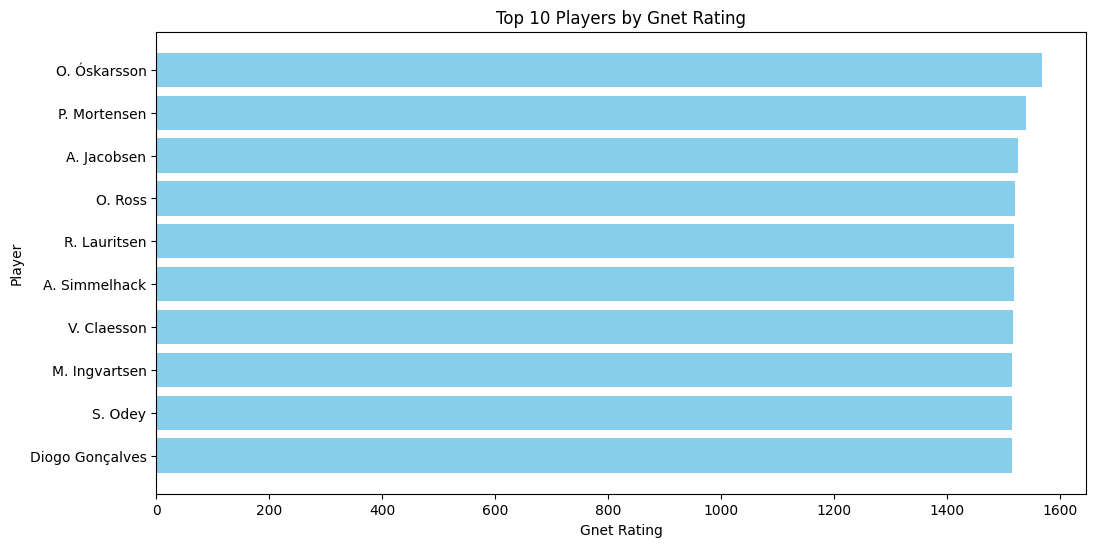

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_team_intervals(file_path, team_id):
    # Load the dataset
    df = pd.read_excel(file_path)
    
    # Define key timestamps
    match_start = df["Time_in_sec"].min()
    first_half_end = 2700
    second_half_start = 2700
    match_end = 5400
    
    # Filter the dataframe for the selected team and opponent
    team_df = df[df["TeamId"] == team_id]
    opponent_df = df[df["TeamId"] != team_id]
    
    # Extract goal times for both teams
    team_goal_times = team_df[team_df["Goal"] == 1]["Time_in_sec"].tolist()
    opponent_goal_times = opponent_df[opponent_df["Goal"] == 1]["Time_in_sec"].tolist()
    
    # Create interval list (including goals and half-time markers)
    team_intervals = sorted(set([match_start, first_half_end, second_half_start, match_end] + team_goal_times + opponent_goal_times))
    
    # Create a DataFrame for intervals
    team_intervals_df = pd.DataFrame(team_intervals, columns=["Time_in_sec"])
    team_intervals_df["xG"] = 0.0
    team_intervals_df["PsxG"] = 0.0
    team_intervals_df["Gamestate"] = ""
    team_intervals_df["Gnet"] = 0
    
    # Initialize goal tracking
    team_goals = 0
    opponent_goals = 0
    
    # Calculate xG, PsxG, and Gnet for each interval
    for i in range(len(team_intervals_df) - 1):
        start_time = team_intervals_df.loc[i, "Time_in_sec"]
        end_time = team_intervals_df.loc[i + 1, "Time_in_sec"]
        
        # Summing xG and PsxG within the interval
        xg_sum = team_df[(team_df["Time_in_sec"] >= start_time) & (team_df["Time_in_sec"] < end_time)]["xG"].astype(float).sum()
        psxg_sum = team_df[(team_df["Time_in_sec"] >= start_time) & (team_df["Time_in_sec"] < end_time)]["PsxG"].astype(float).sum()
        team_intervals_df.loc[i, "xG"] = xg_sum
        team_intervals_df.loc[i, "PsxG"] = psxg_sum
        
        # Assigning Gamestate to the interval
        gamestate_values = team_df[(team_df["Time_in_sec"] >= start_time) & (team_df["Time_in_sec"] < end_time)]["Gamestate"].unique()
        if len(gamestate_values) > 0:
            team_intervals_df.loc[i, "Gamestate"] = gamestate_values[-1]
        
        # Count goals in this interval
        new_team_goals = len(team_df[(team_df["Time_in_sec"] >= start_time) & (team_df["Time_in_sec"] < end_time) & (team_df["Goal"] == 1)])
        new_opponent_goals = len(opponent_df[(opponent_df["Time_in_sec"] >= start_time) & (opponent_df["Time_in_sec"] < end_time) & (opponent_df["Goal"] == 1)])
        
        # Compute Gnet (impact of goals in this interval)
        team_intervals_df.loc[i, "Gnet"] = new_team_goals - new_opponent_goals
    
    return team_intervals_df

def calculate_player_impact(file_path):
    df = pd.read_excel(file_path)
    
    # Group by player and analyze impact based on xG, PsxG, and Gamestate
    player_impact = df.groupby("PlayerId").agg(
        total_xG=("xG", "sum"),
        total_PsxG=("PsxG", "sum"),
        matches_played=("Date", "nunique"),
        impact_in_draws=("Gamestate", lambda x: (x == "Draw").sum()),
    ).reset_index()
    
    # Calculate Gnet rating based on Glicko-style updates (simplified version)
    player_impact["Gnet_rating"] = 1500 + (player_impact["total_xG"] + player_impact["total_PsxG"] - player_impact["impact_in_draws"]) * 10
    
    return player_impact

# Example usage
file_path = "/Users/marclambertes/Downloads/Outswinger FC - Expected Goals/Denmark xG 04022025.xlsx"  # Update with your actual file path
team_id = "Lyngby Boldklub"  # Replace with the desired team
team_intervals_df = calculate_team_intervals(file_path, team_id)
player_impact_df = calculate_player_impact(file_path)

# Save the output to an Excel file
output_file = "xG_Analysis.xlsx"
with pd.ExcelWriter(output_file) as writer:
    team_intervals_df.to_excel(writer, sheet_name="Team Intervals", index=False)
    player_impact_df.to_excel(writer, sheet_name="Player Impact", index=False)

# Select the top 10 players by Gnet rating
top_10_players = player_impact_df.nlargest(10, "Gnet_rating")

# Create a bar plot for top 10 Gnet ratings
plt.figure(figsize=(12, 6))
plt.barh(top_10_players["PlayerId"], top_10_players["Gnet_rating"], color='skyblue')
plt.xlabel("Gnet Rating")
plt.ylabel("Player")
plt.title("Top 10 Players by Gnet Rating")
plt.gca().invert_yaxis()  # Invert y-axis to show highest rating on top
plt.show()

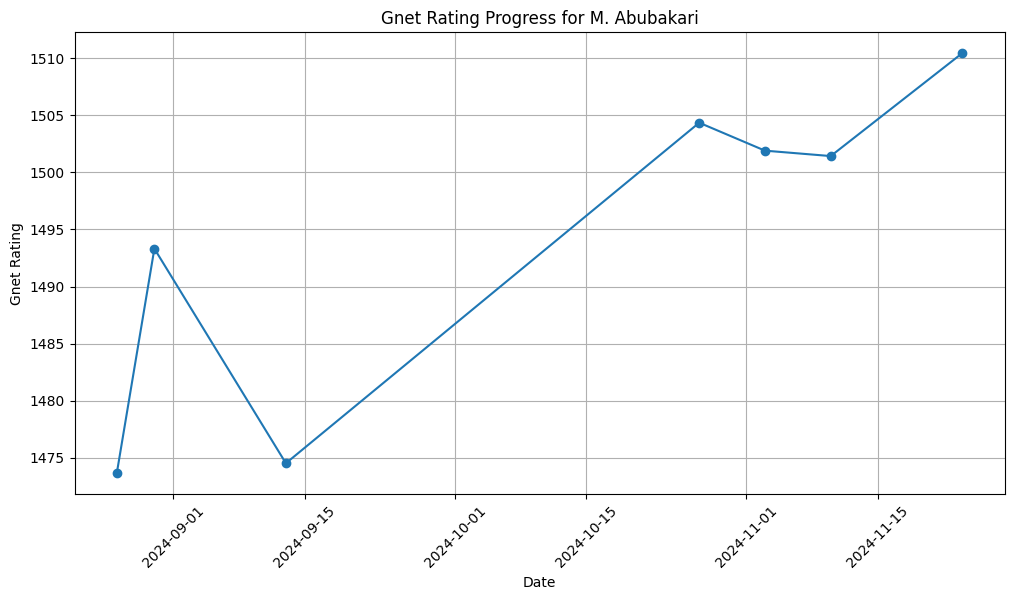

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_team_intervals(file_path, team_id):
    # Load the dataset
    df = pd.read_excel(file_path)
    
    # Define key timestamps
    match_start = df["Time_in_sec"].min()
    first_half_end = 2700
    second_half_start = 2700
    match_end = 5400
    
    # Filter the dataframe for the selected team and opponent
    team_df = df[df["TeamId"] == team_id]
    opponent_df = df[df["TeamId"] != team_id]
    
    # Extract goal times for both teams
    team_goal_times = team_df[team_df["Goal"] == 1]["Time_in_sec"].tolist()
    opponent_goal_times = opponent_df[opponent_df["Goal"] == 1]["Time_in_sec"].tolist()
    
    # Create interval list (including goals and half-time markers)
    team_intervals = sorted(set([match_start, first_half_end, second_half_start, match_end] + team_goal_times + opponent_goal_times))
    
    # Create a DataFrame for intervals
    team_intervals_df = pd.DataFrame(team_intervals, columns=["Time_in_sec"])
    team_intervals_df["xG"] = 0.0
    team_intervals_df["PsxG"] = 0.0
    team_intervals_df["Gamestate"] = ""
    team_intervals_df["Gnet"] = 0
    
    # Initialize goal tracking
    team_goals = 0
    opponent_goals = 0
    
    # Calculate xG, PsxG, and Gnet for each interval
    for i in range(len(team_intervals_df) - 1):
        start_time = team_intervals_df.loc[i, "Time_in_sec"]
        end_time = team_intervals_df.loc[i + 1, "Time_in_sec"]
        
        # Summing xG and PsxG within the interval
        xg_sum = team_df[(team_df["Time_in_sec"] >= start_time) & (team_df["Time_in_sec"] < end_time)]["xG"].astype(float).sum()
        psxg_sum = team_df[(team_df["Time_in_sec"] >= start_time) & (team_df["Time_in_sec"] < end_time)]["PsxG"].astype(float).sum()
        team_intervals_df.loc[i, "xG"] = xg_sum
        team_intervals_df.loc[i, "PsxG"] = psxg_sum
        
        # Assigning Gamestate to the interval
        gamestate_values = team_df[(team_df["Time_in_sec"] >= start_time) & (team_df["Time_in_sec"] < end_time)]["Gamestate"].unique()
        if len(gamestate_values) > 0:
            team_intervals_df.loc[i, "Gamestate"] = gamestate_values[-1]
        
        # Count goals in this interval
        new_team_goals = len(team_df[(team_df["Time_in_sec"] >= start_time) & (team_df["Time_in_sec"] < end_time) & (team_df["Goal"] == 1)])
        new_opponent_goals = len(opponent_df[(opponent_df["Time_in_sec"] >= start_time) & (opponent_df["Time_in_sec"] < end_time) & (opponent_df["Goal"] == 1)])
        
        # Compute Gnet (impact of goals in this interval)
        team_intervals_df.loc[i, "Gnet"] = new_team_goals - new_opponent_goals
    
    return team_intervals_df

def calculate_player_impact(file_path):
    df = pd.read_excel(file_path)
    df["Date"] = pd.to_datetime(df["Date"]).dt.date  # Extract only the date part
    
    # Group by player and analyze impact based on xG, PsxG, and Gamestate
    player_impact = df.groupby(["PlayerId", "Date"]).agg(
        total_xG=("xG", "sum"),
        total_PsxG=("PsxG", "sum"),
        impact_in_draws=("Gamestate", lambda x: (x == "Draw").sum()),
    ).reset_index()
    
    # Calculate Gnet rating based on Glicko-style updates (simplified version)
    player_impact["Gnet_rating"] = 1500 + (player_impact["total_xG"] + player_impact["total_PsxG"] - player_impact["impact_in_draws"]) * 10
    
    return player_impact

def plot_player_progress(player_impact_df, player_id):
    player_df = player_impact_df[player_impact_df["PlayerId"] == player_id]
    
    plt.figure(figsize=(12, 6))
    plt.plot(player_df["Date"], player_df["Gnet_rating"], marker='o', linestyle='-')
    plt.xlabel("Date")
    plt.ylabel("Gnet Rating")
    plt.title(f"Gnet Rating Progress for {player_id}")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Example usage
file_path = "/Users/marclambertes/Downloads/Outswinger FC - Expected Goals/Denmark xG 04022025.xlsx"  # Update with your actual file path
player_id = "M. Abubakari"  # Replace with the desired player
player_impact_df = calculate_player_impact(file_path)
plot_player_progress(player_impact_df, player_id)
